In [12]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from drawer import plot_spectogram, plot, spectral_difference
from nmf import NMF

FRAME1 = 4096
HOP = 2048
MAX_ITER = 20

In [13]:
part1_org, sr = librosa.load('../data/sound2.wav')
part2_org, sr = librosa.load('../data/sound1.wav')

trim = min(len(part1_org), len(part2_org))

part1_org = part1_org[:trim]
part2_org = part2_org[:trim]

orgs = np.vstack([part1_org, part2_org])

display(ipd.Audio(part1_org, rate = sr))
display(ipd.Audio(part2_org, rate = sr))

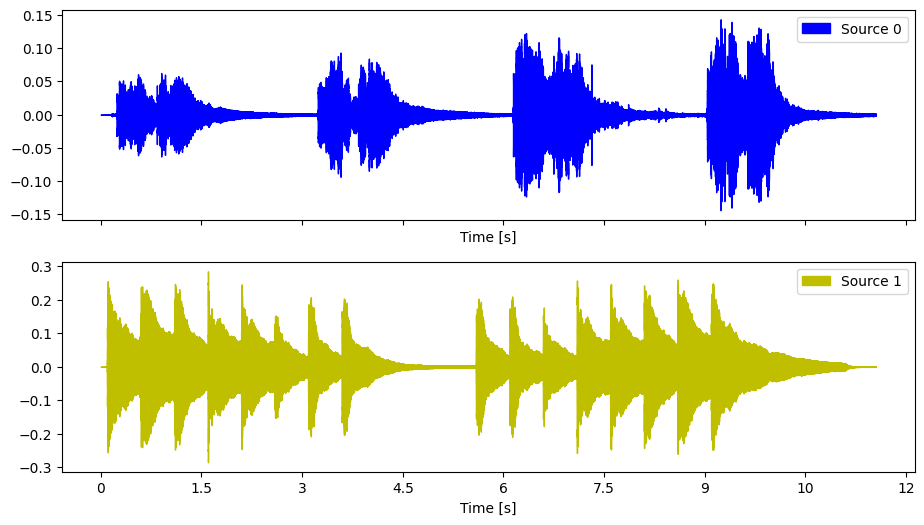

In [14]:
plot(orgs, sr)

In [15]:
part1, sr = librosa.load('../data/sound2_mix.mp3')
part2, sr = librosa.load('../data/sound1_mix.mp3')

trim = min(len(part1), len(part2))

part1 = part1[:trim]
part2 = part2[:trim]

x = np.array([part1, part2])

display(ipd.Audio(part1, rate = sr))
display(ipd.Audio(part2, rate = sr))

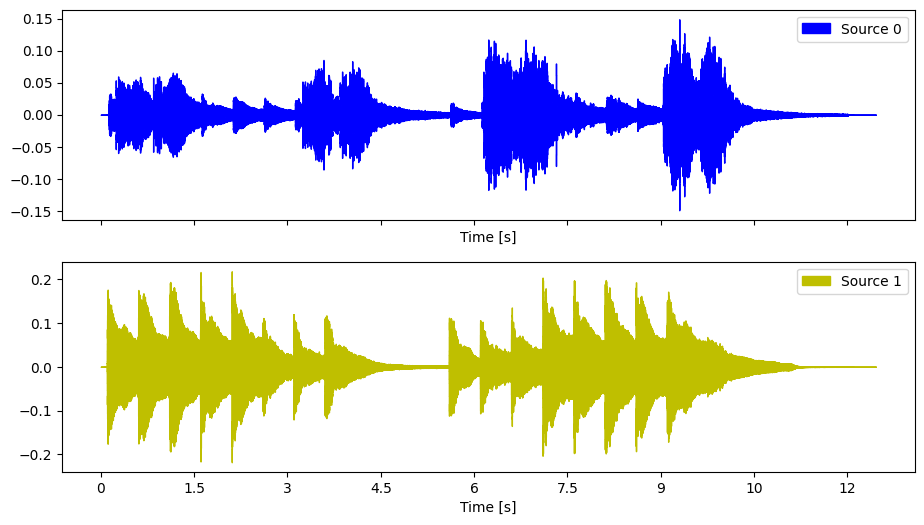

In [16]:
plot(x, sr)

In [17]:
channels = 2
D = librosa.stft(part1, n_fft=FRAME1, hop_length=HOP)
magnitude = np.abs(D) 
W, H, cost_func = NMF(magnitude, channels, MAXITER = MAX_ITER)

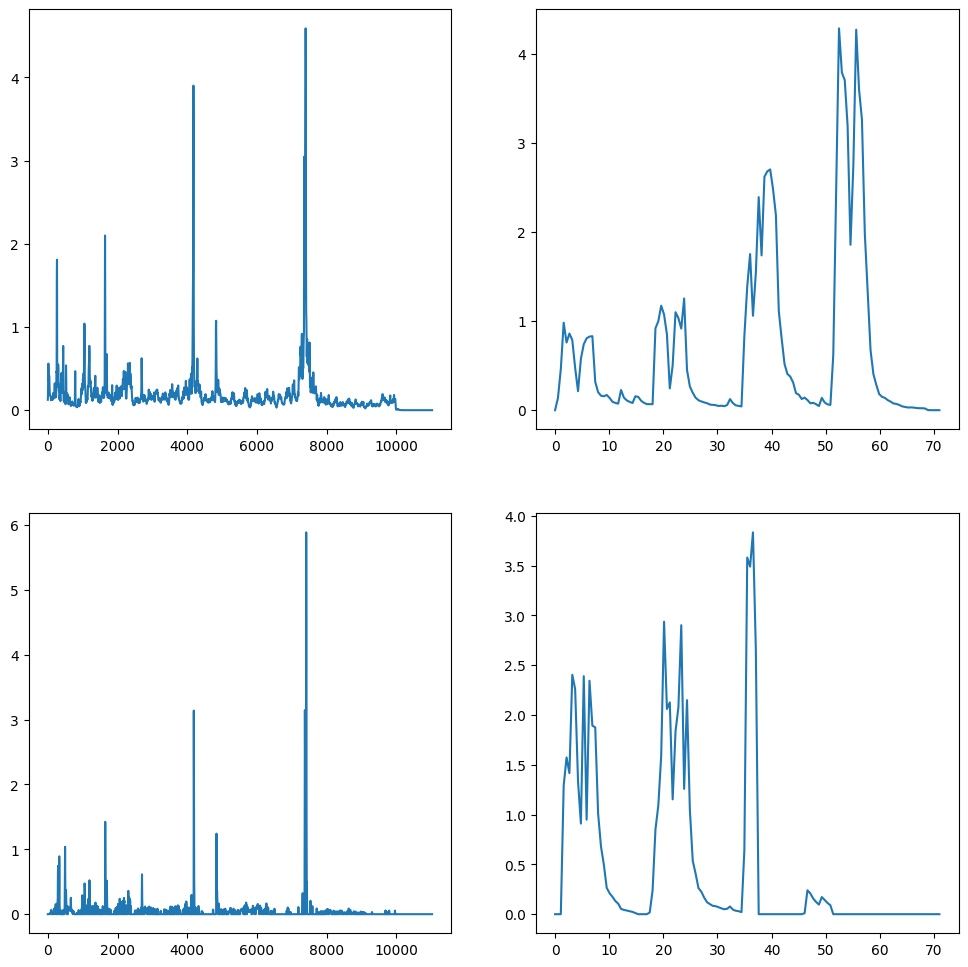

In [18]:
dims = np.shape(magnitude)
rows = dims[0]
cols = dims[1]
f, axs = plt.subplots(channels, 2, figsize=(12,12))
axs[0,0].set_title = 'W'
axs[0,1].set_title = 'H'
for row in range(channels):
    axs[row,0].plot(np.linspace(0, 11025,rows),W[:,row])
    axs[row,1].plot(np.linspace(0, 71,cols),H[row])

In [19]:
sound_lst = []
fils_l = [[0], [1]]
for i in range(2):
    sound_stft_A = np.angle(D)
    filters = fils_l[i]
    filtered = W[:,filters]@H[filters,:]
    reconst = filtered * np.exp(1j*sound_stft_A)
    new_sound = librosa.istft(reconst, n_fft=FRAME1, hop_length=HOP)
    sound_lst.append(new_sound)

In [20]:
sound = sound_lst[0]
display(ipd.Audio(sound, rate=sr))

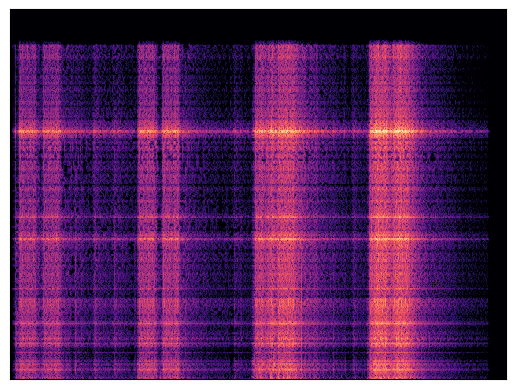

In [21]:
plot_spectogram(sound, sr)

In [22]:
spd = spectral_difference(part1_org, sound)
print("Spectral difference beetween original and separated : ", spd)

Spectral difference beetween original and separated :  0.0728204238319719
